# 导入数据

In [75]:
import pandas as pd
import numpy as np

In [76]:
data = pd.read_excel(r'.\in\data-20230322.xlsx')
data

,PUBCHEM_CID,DRUG_NAME,source,Autonomic nervous system disorders,label,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
0,247,Betaine,ADReCS,Urinary incontinence,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,444,Bupropion,ADReCS,Incontinence; Urinary incontinence; Orthostati...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,772,Enoxaparin,ADReCS,Urinary incontinence; Orthostatic hypotension;...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,937,Nicotinate,ADReCS,Orthostatic hypotension; Anal incontinence,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1727,Dalfampridine,ADReCS,Incontinence; Urinary incontinence; Anal incon...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,O[C@H]1O[C@H](COS(=O)(=O)O)[C@@H](O[C@@H]2O[C@...,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1806,NCCS,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1807,CC(=O)C1(O)CCC2C3C=C(Cl)C4=CC(=O)C5CC5C4(C)C3C...,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1808,CN(c1ccc2c(C)n(C)nc2c1)c3ccnc(Nc4ccc(C)c(c4)S(...,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
y = data.iloc[:,4]
x = data.iloc[:,5:]
print(x)
print(y)

      atom:element_main_group  atom:element_metal_group_I_II  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
1805                        0                              0   
1806                        0                              0   
1807                        0                              0   
1808                        0                              0   
1809                        0                              0   

      atom:element_metal_group_III  atom:element_metal_metalloid  \
0                                0                             0   
1                                0                             0   
2                          

# 数据划分

In [78]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=120)

In [79]:
pd.value_counts(Ytrain)

0    728
1    539
Name: label, dtype: int64

In [80]:
pd.value_counts(Ytest)

0    305
1    238
Name: label, dtype: int64

In [81]:
Xtrain.to_excel(r".\out\Xtrain0.xlsx")
Xtest.to_excel(r".\out\Xtest0.xlsx")
pd.DataFrame(Ytrain).to_excel(r".\out\Ytrain0.xlsx")
pd.DataFrame(Ytest).to_excel(r".\out\Ytest0.xlsx")

In [82]:
#恢复索引
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
#恢复索引
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [83]:
Xtrain.to_excel(r".\out\Xtrain.xlsx")
Xtest.to_excel(r".\out\Xtest.xlsx")
Ytrain.to_excel(r".\out\Ytrain.xlsx")
Ytest.to_excel(r".\out\Ytest.xlsx")

# 建模输入

In [84]:
Xtrainmodel = pd.read_excel(r".\in\Xtrainmodel.xlsx")

In [85]:
Xtestmodel = pd.read_excel(r".\in\Xtestmodel.xlsx")

In [86]:
Xtrainmodel = Xtrainmodel.fillna(0)
Xtestmodel = Xtestmodel.fillna(0)

In [87]:
Xtrainmodel

,bond:C(=O)N_carboxamide_generic,bond:C(=O)O_carboxylicAcid_generic,bond:C=O_carbonyl_generic,bond:CN_amine_alicyclic_generic,bond:CN_amine_aliphatic_generic,bond:COC_ether_aliphatic,bond:COC_ether_aliphatic__aromatic,bond:COH_alcohol_generic,bond:quatN_generic,bond:S=O_sulfonyl_generic,bond:X[any]_halide,bond:X[any_!C]_halide_inorganic,chain:alkaneBranch_isopropyl_C3,chain:alkaneCyclic_ethyl_C2_(connect_noZ),chain:alkaneLinear_ethyl_C2(H_gt_1),chain:alkaneLinear_ethyl_C2_(connect_noZ_CN=4),chain:aromaticAlkane_Ph-C1_acyclic_generic,chain:aromaticAlkane_Ph-C1_cyclic,ring:hetero_[5]_Z_1-Z,ring:hetero_[6]_Z_generic
0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0
1263,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1
1264,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1265,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0


In [88]:
Xtestmodel

,bond:C(=O)N_carboxamide_generic,bond:C(=O)O_carboxylicAcid_generic,bond:C=O_carbonyl_generic,bond:CN_amine_alicyclic_generic,bond:CN_amine_aliphatic_generic,bond:COC_ether_aliphatic,bond:COC_ether_aliphatic__aromatic,bond:COH_alcohol_generic,bond:quatN_generic,bond:S=O_sulfonyl_generic,bond:X[any]_halide,bond:X[any_!C]_halide_inorganic,chain:alkaneBranch_isopropyl_C3,chain:alkaneCyclic_ethyl_C2_(connect_noZ),chain:alkaneLinear_ethyl_C2(H_gt_1),chain:alkaneLinear_ethyl_C2_(connect_noZ_CN=4),chain:aromaticAlkane_Ph-C1_acyclic_generic,chain:aromaticAlkane_Ph-C1_cyclic,ring:hetero_[5]_Z_1-Z,ring:hetero_[6]_Z_generic
0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1
1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1
2,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1
3,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1
4,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
539,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
540,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
541,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1


In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,recall_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 随机森林分类&调参

In [90]:
Ytrain.shape

(1267,)

In [91]:

param_test3={'max_depth':range(1,20,1)}
grid_search_2=GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, random_state=68),param_grid=param_test3,scoring='accuracy',cv=10)
grid_search_2.fit(Xtrainmodel,Ytrain)
print(grid_search_2.best_params_)
print(grid_search_2.best_score_)

{'max_depth': 6}
0.7458255218097738


In [92]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=180,random_state=85)
rfc_c = rfc.fit(Xtrainmodel, Ytrain)
rfcy_pred = rfc_c.predict(Xtestmodel)

In [93]:
from sklearn import metrics
# 计算测试集的R2、MSE值
print(metrics.accuracy_score(Ytest, rfcy_pred))
print(metrics.f1_score(Ytest, rfcy_pred))
print(metrics.roc_auc_score(Ytest, rfcy_pred))
print(metrics.matthews_corrcoef(Ytest, rfcy_pred))

0.7016574585635359
0.6567796610169492
0.6961220553795289
0.3930136745331132


In [94]:
conf_mattest = confusion_matrix(Ytest, rfcy_pred)

In [95]:
conf_mattest

array([[226,  79],
       [ 83, 155]], dtype=int64)

In [96]:
print(cross_val_score(rfc_c,Xtrainmodel,Ytrain,cv=10,scoring="accuracy").mean())
print(cross_val_score(rfc_c,Xtrainmodel,Ytrain,cv=10,scoring="f1").mean())
print(cross_val_score(rfc_c,Xtrainmodel,Ytrain,cv=10,scoring="roc_auc").mean())

0.7237782777152857
0.6662109085836508
0.7950361079467797


In [97]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
ycm_pred = cross_val_predict(rfc_c,Xtrainmodel,Ytrain,cv=10)
conf_mat = confusion_matrix(Ytrain, ycm_pred)

In [98]:
conf_mat 

array([[565, 163],
       [187, 352]], dtype=int64)

In [99]:
from sklearn.model_selection import GridSearchCV
param_test1={'n_estimators':range(1,300,10)}
grid_search=GridSearchCV(estimator=RandomForestClassifier(random_state=85),param_grid=param_test1,scoring='accuracy',cv=10)
grid_search.fit(Xtrainmodel,Ytrain)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 181}
0.7253593300837397


In [100]:
param_test3={'max_depth':range(1,20,1)}
grid_search_2=GridSearchCV(estimator=RandomForestClassifier(n_estimators=180, random_state=85),param_grid=param_test3,scoring='accuracy',cv=10)
grid_search_2.fit(Xtrainmodel,Ytrain)
print(grid_search_2.best_params_)
print(grid_search_2.best_score_)

{'max_depth': 6}
0.7434508186476692


# 支持向量机分类&调参

In [101]:
Xtrainmodel.shape

(1267, 20)

In [102]:
Xtestmodel.shape

(543, 20)

In [103]:
from sklearn import svm
svm_ = svm.SVC()
svm_c = svm_.fit(Xtrainmodel, Ytrain)
svmy_pred = svm_c.predict(Xtestmodel)

In [104]:
print(metrics.accuracy_score(Ytest, svmy_pred))
print(metrics.f1_score(Ytest, svmy_pred))
print(metrics.roc_auc_score(Ytest, svmy_pred))
print(metrics.matthews_corrcoef(Ytest, svmy_pred))

0.6924493554327809
0.6297117516629711
0.6819258851081416
0.3697567566814339


In [105]:
svmconf_mattest = confusion_matrix(Ytest, svmy_pred)
print(svmconf_mattest)

[[234  71]
 [ 96 142]]


In [106]:
print(cross_val_score(svm_c,Xtrainmodel, Ytrain,cv=10,scoring="accuracy").mean())
print(cross_val_score(svm_c,Xtrainmodel, Ytrain,cv=10,scoring="f1").mean())
print(cross_val_score(svm_c,Xtrainmodel, Ytrain,cv=10,scoring="roc_auc").mean())

0.7442632170978628
0.6734473280971331
0.8087264150943396


In [107]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
svmycm_pred = cross_val_predict(svm_c,Xtrainmodel,Ytrain,cv=10)
svmconf_mat = confusion_matrix(Ytrain, svmycm_pred)
print(svmconf_mat)

[[604 124]
 [200 339]]


In [108]:
pd.value_counts(Ytrain)

0    728
1    539
Name: label, dtype: int64

In [109]:
pd.value_counts(Ytest)

0    305
1    238
Name: label, dtype: int64

In [110]:
Ytrain.shape

(1267,)

In [111]:
Ytest.shape

(543,)

# K近邻分类&调参

In [112]:
from sklearn import model_selection

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# 设置待测试的不同k值
K = np.arange(1,8)
# 构建空的列表，用于存储r2
AUC = []
for k in K:
    # 使用10重交叉验证的方法，比对每一个k值下KNN模型的预测r2
    cv_result = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors = int(k)),
                                                                         Xtrainmodel,Ytrain,cv = 10, scoring='accuracy')
    AUC.append(cv_result.mean())
AUC

[0.6827334083239595,
 0.6763904511936009,
 0.7245594300712412,
 0.6850581177352831,
 0.7213723284589427,
 0.7134858142732159,
 0.7324209473815774]

In [115]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

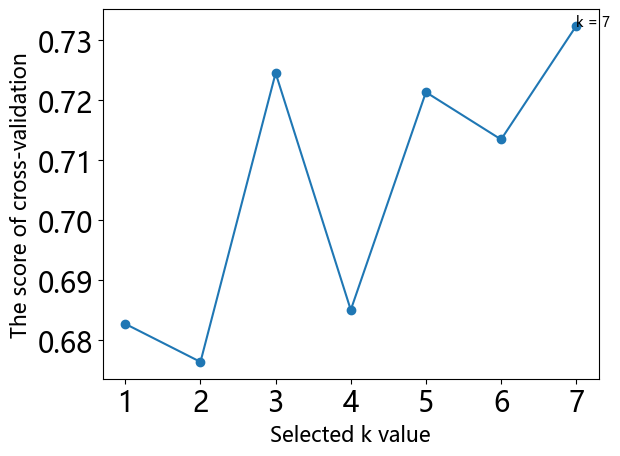

In [116]:
# 从k个平均r2中挑选出最大值所对应的下标    
arg_max = np.array(AUC).argmax()
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制不同K值与平均预测r2之间的折线图
plt.plot(K, AUC)
# 添加点图
plt.scatter(K, AUC)
# 添加文字说明
plt.text(K[arg_max], AUC[arg_max], 'k = %s' %int(K[arg_max]))
# 显示图形
plt.xlabel("Selected k value",fontsize=15)
plt.ylabel("The score of cross-validation",fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Selected k value.png",dpi=600,bbox_inches='tight')#保存图片
plt.show

In [117]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh_c = neigh.fit(Xtrainmodel, Ytrain)
knny_pred = neigh_c.predict(Xtestmodel)

In [118]:
print(metrics.accuracy_score(Ytest, knny_pred))
print(metrics.f1_score(Ytest, knny_pred))
print(metrics.roc_auc_score(Ytest, knny_pred))
print(metrics.matthews_corrcoef(Ytest, knny_pred))

0.6979742173112339
0.6387665198237885
0.688228406116545
0.38163905051187286


In [119]:
knnconf_mattest = confusion_matrix(Ytest, knny_pred)
print(knnconf_mattest)

[[234  71]
 [ 93 145]]


In [120]:
print(cross_val_score(neigh_c,Xtrainmodel, Ytrain,cv=10,scoring="accuracy").mean())
print(cross_val_score(neigh_c,Xtrainmodel, Ytrain,cv=10,scoring="f1").mean())
print(cross_val_score(neigh_c,Xtrainmodel, Ytrain,cv=10,scoring="roc_auc").mean())

0.7324209473815774
0.6660097157138722
0.7907615648336945


In [121]:
knnycm_pred = cross_val_predict(neigh_c,Xtrainmodel,Ytrain,cv=10)
knnconf_mat = confusion_matrix(Ytrain, knnycm_pred)
print(knnconf_mat)

[[585 143]
 [196 343]]


# 梯度提升决策树分类&调参

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=68, n_estimators=50)
GB_c = GB.fit(Xtrainmodel,Ytrain)
GBy_pred = GB_c.predict(Xtestmodel)
GBy0_pred = GB_c.predict(Xtrainmodel)

In [123]:
# 计算测试集的R2、MSE值
print(metrics.accuracy_score(Ytest, GBy_pred))
print(metrics.f1_score(Ytest, GBy_pred))
print(metrics.roc_auc_score(Ytest, GBy_pred))
print(metrics.matthews_corrcoef(Ytest, GBy_pred))

0.6942909760589319
0.6261261261261262
0.6821807411489187
0.3725823673057774


In [124]:
from sklearn.model_selection import GridSearchCV
param_test5={'n_estimators':range(1,300,10)}
grid_search5=GridSearchCV(estimator=GradientBoostingClassifier(random_state=68),param_grid=param_test5,scoring='accuracy',cv=10)
grid_search5.fit(Xtrainmodel,Ytrain)
print(grid_search5.best_params_)
print(grid_search5.best_score_)

{'n_estimators': 51}
0.7600549931258593


In [125]:
gbconf_mattest = confusion_matrix(Ytest,GBy_pred)
print(gbconf_mattest)

[[238  67]
 [ 99 139]]


In [126]:
print(cross_val_score(GB_c,Xtrainmodel, Ytrain,cv=10,scoring="accuracy").mean())
print(cross_val_score(GB_c,Xtrainmodel, Ytrain,cv=10,scoring="f1").mean())
print(cross_val_score(GB_c,Xtrainmodel, Ytrain,cv=10,scoring="roc_auc").mean())

0.7600487439070116
0.6973323028415617
0.8125129597986316


In [127]:
GBycm_pred = cross_val_predict(GB_c,Xtrainmodel,Ytrain,cv=10)
GBconf_mat = confusion_matrix(Ytrain, GBycm_pred)
print(GBconf_mat)

[[609 119]
 [185 354]]


# 决策树分类模型&调参

In [128]:
from sklearn import tree

In [129]:
from sklearn.model_selection import GridSearchCV #网格搜索

In [130]:
# 预设各参数的不同选项值
max_depth = [5,7,9,15,20,30]
min_samples_leaf = [5,6,7,8,9,10,15,20,30]
min_samples_split = [5,6,7,8,9,10,15,20,30]
parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
# 网格搜索法，测试不同的参数值
grid_dt = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = parameters, cv=10)
# 模型拟合
grid_dt_c = grid_dt.fit(Xtrainmodel, Ytrain)
# 返回最佳组合的参数值
grid_dt_c.best_params_,grid_dt_c.best_score_

({'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 5},
 0.737132858392701)

In [131]:
dtc = tree.DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 6, min_samples_split = 10,random_state=85)
dtc_c = dtc.fit(Xtrainmodel, Ytrain)
dtcy_pred = dtc_c.predict(Xtestmodel)

In [132]:
print(metrics.accuracy_score(Ytest, dtcy_pred))
print(metrics.f1_score(Ytest, dtcy_pred))
print(metrics.roc_auc_score(Ytest, dtcy_pred))
print(metrics.matthews_corrcoef(Ytest, dtcy_pred))

0.6850828729281768
0.6415094339622641
0.6804449648711943
0.3607259780591293


In [133]:
dtcconf_mattest = confusion_matrix(Ytest,dtcy_pred)
print(dtcconf_mattest)

[[219  86]
 [ 85 153]]


In [134]:
print(cross_val_score(dtc,Xtrainmodel, Ytrain,cv=10,scoring="accuracy").mean())
print(cross_val_score(dtc,Xtrainmodel, Ytrain,cv=10,scoring="f1").mean())
print(cross_val_score(dtc,Xtrainmodel, Ytrain,cv=10,scoring="roc_auc").mean())

0.737132858392701
0.6702325078468683
0.7878574930039024


In [135]:
dtcycm_pred = cross_val_predict(dtc,Xtrainmodel,Ytrain,cv=10)
dtcconf_mat = confusion_matrix(Ytrain, dtcycm_pred)
print(dtcconf_mat)

[[592 136]
 [197 342]]
